In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
#! SETUP 1
import sys, os
_snlp_book_dir = "../../../../"
sys.path.append(_snlp_book_dir) 
import math
from glob import glob
from os.path import isfile, join
from statnlpbook.vocab import Vocab
from statnlpbook.scienceie import calculateMeasures
import shutil
import string

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pickle import load
from Extra_files.modules.scaling import upscale

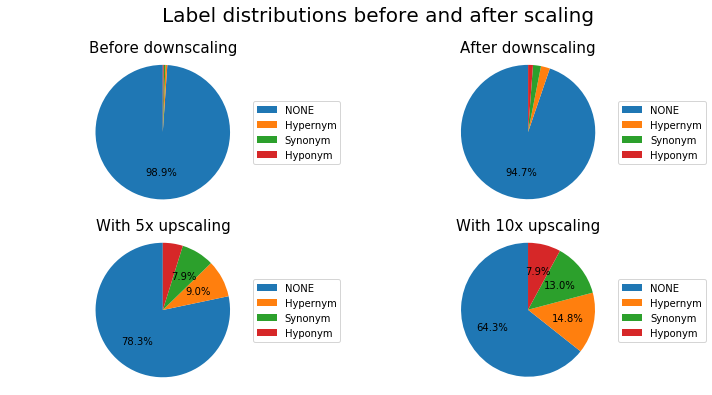

In [31]:
dict_before = [('NONE', 56935), ('Hypernym', 256), ('Synonym', 230), ('Hyponym', 137)]
dict_after = [('NONE', 11150), ('Hypernym', 256), ('Synonym', 225), ('Hyponym', 137)]

def upscale(factor):
    dict_upscale = [dict_after[0]] + [(dict_after[idx][0],dict_after[idx][1]*factor) for idx in range(1,len(dict_after))]
    return dict_upscale

scale_1 = 5
scale_2 = 10

def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

labels = np.array([x[0] for x in dict_before])
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,6))

fig.suptitle('Label distributions before and after scaling',x = 0.55, y=1,fontsize = 20)

titles = ['Before downscaling', 'After downscaling', 'With ' + str(scale_1) + 'x upscaling', 'With ' + str(scale_2) + 'x upscaling']
axes = [ax1,ax2, ax3, ax4]
dicts = [dict_before, dict_after, upscale(scale_1),upscale(scale_2)]
for i in range(len(titles)):
    
    sizes = [x[1] for x in dicts[i]]

    axes[i].pie(sizes,autopct=my_autopct, startangle=90)
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].set_title(titles[i],fontdict = {'fontsize': 15})
    axes[i].legend(labels,bbox_to_anchor=(1.1,0.5), loc="center right")

plt.show()